##Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("/content/breast_cancer_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8.423020e+05,M,17.998968,10.565640,122.852200,1001.106710,0.081984,0.285834,0.398145,0.148971,0.353091,0.017206,0.973743,0.765052,8.560768,153.418144,-0.186312,0.217184,0.160208,-0.079299,-0.023415,0.005301,25.440416,17.224112,184.661651,2019.152914,0.246364,0.698641,0.738654,0.066592,0.457838,0.142958
1,8.425170e+05,M,20.511013,17.787839,132.954490,1325.823346,0.245554,0.194282,0.138061,0.181164,0.263240,-0.077472,0.603223,0.656813,3.479828,73.881462,0.101236,-0.095907,0.143084,0.153995,0.024608,0.000619,24.826036,23.518646,158.844671,1955.890927,0.004187,0.143044,0.123242,0.460569,0.314415,0.178515
2,8.430090e+07,M,19.763749,21.134635,129.917650,1202.924928,0.216573,0.259434,0.131534,0.167189,0.242958,0.173663,0.861760,0.757405,4.515927,94.174936,0.174298,0.114017,-0.002335,-0.112769,-0.119702,0.113259,23.533687,25.667160,152.490715,1708.938861,0.203708,0.317832,0.483000,0.323903,0.394406,0.042000
3,8.434830e+07,M,11.449166,20.516768,77.383695,385.991075,0.198868,0.213599,0.087538,0.080289,0.334566,0.157591,0.222218,1.241904,3.513392,27.107167,-0.114500,0.247295,-0.047021,0.145091,-0.031787,0.164126,14.824450,26.557872,99.092503,567.891598,0.192048,0.808203,0.667493,0.332574,0.567382,0.175874
4,8.435840e+07,M,20.354812,14.199572,135.217358,1296.950523,0.115178,0.119498,0.027547,0.023348,0.229555,0.070076,0.934170,0.611162,5.334372,94.382490,-0.116488,0.146142,0.225344,0.024724,0.075117,-0.065606,22.513137,16.567093,152.203620,1574.985822,0.150841,0.184497,0.293628,0.290815,0.146084,0.009563


In [ ]:
#Changing the data from Categorical to Binary
df["diagnosis"].replace({"M": 1, "B": 0}, inplace=True)
df.drop("id", axis=1, inplace=True)
df_ordered = df[['diagnosis', 'radius_mean', 'radius_se', 'radius_worst',
         'texture_mean', 'texture_se', 'texture_worst',
         'perimeter_mean', 'perimeter_se', 'perimeter_worst',
         'area_mean', 'area_se', 'area_worst',
         'smoothness_mean', 'smoothness_se', 'smoothness_worst',
         'compactness_mean', 'compactness_se', 'compactness_worst',
         'concavity_mean', 'concavity_se', 'concavity_worst',
         'concave points_mean', 'concave points_se', 'concave points_worst',
         'symmetry_mean', 'symmetry_se', 'symmetry_worst',
         'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']]
df_ordered.head()

,diagnosis,radius_mean,radius_se,radius_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,area_se,area_worst,smoothness_mean,smoothness_se,smoothness_worst,compactness_mean,compactness_se,compactness_worst,concavity_mean,concavity_se,concavity_worst,concave points_mean,concave points_se,concave points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,1,17.998968,0.973743,25.440416,10.565640,0.765052,17.224112,122.852200,8.560768,184.661651,1001.106710,153.418144,2019.152914,0.081984,-0.186312,0.246364,0.285834,0.217184,0.698641,0.398145,0.160208,0.738654,0.148971,-0.079299,0.066592,0.353091,-0.023415,0.457838,0.017206,0.005301,0.142958
1,1,20.511013,0.603223,24.826036,17.787839,0.656813,23.518646,132.954490,3.479828,158.844671,1325.823346,73.881462,1955.890927,0.245554,0.101236,0.004187,0.194282,-0.095907,0.143044,0.138061,0.143084,0.123242,0.181164,0.153995,0.460569,0.263240,0.024608,0.314415,-0.077472,0.000619,0.178515
2,1,19.763749,0.861760,23.533687,21.134635,0.757405,25.667160,129.917650,4.515927,152.490715,1202.924928,94.174936,1708.938861,0.216573,0.174298,0.203708,0.259434,0.114017,0.317832,0.131534,-0.002335,0.483000,0.167189,-0.112769,0.323903,0.242958,-0.119702,0.394406,0.173663,0.113259,0.042000
3,1,11.449166,0.222218,14.824450,20.516768,1.241904,26.557872,77.383695,3.513392,99.092503,385.991075,27.107167,567.891598,0.198868,-0.114500,0.192048,0.213599,0.247295,0.808203,0.087538,-0.047021,0.667493,0.080289,0.145091,0.332574,0.334566,-0.031787,0.567382,0.157591,0.164126,0.175874
4,1,20.354812,0.934170,22.513137,14.199572,0.611162,16.567093,135.217358,5.334372,152.203620,1296.950523,94.382490,1574.985822,0.115178,-0.116488,0.150841,0.119498,0.146142,0.184497,0.027547,0.225344,0.293628,0.023348,0.024724,0.290815,0.229555,0.075117,0.146084,0.070076,-0.065606,0.009563


In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.376000,14.136307,19.261162,92.028693,655.580275,0.095852,0.102893,0.088346,0.050657,0.180089,0.063686,0.405288,1.216831,2.867494,40.403172,0.007799,0.028614,0.033445,0.010889,0.019046,0.003776,16.283429,25.649434,107.362482,882.139326,0.132123,0.252859,0.272496,0.115833,0.290451,0.081731
std,0.484428,3.519792,4.281229,24.265380,351.248270,0.099077,0.112620,0.129240,0.106614,0.104576,0.101157,0.291935,0.559907,2.017588,45.180428,0.099718,0.102087,0.106072,0.100477,0.099517,0.099832,4.832824,6.134428,33.572535,568.608279,0.101763,0.187333,0.231497,0.122403,0.118477,0.101250
min,0.000000,6.788208,9.595159,43.672436,143.352701,-0.264052,-0.326382,-0.318571,-0.339098,-0.212350,-0.314672,-0.127587,0.122288,0.584548,6.632779,-0.369697,-0.328564,-0.351072,-0.382377,-0.346203,-0.358267,7.824986,11.880520,50.303316,185.054864,-0.237304,-0.236335,-0.247935,-0.326375,-0.108644,-0.291340
25%,0.000000,11.702172,16.157728,75.102944,420.263711,0.029605,0.025387,-0.001326,-0.023709,0.109565,-0.007429,0.222130,0.833360,1.624047,17.862507,-0.060620,-0.040380,-0.037251,-0.056661,-0.049032,-0.063271,12.998994,21.080184,84.132952,515.329216,0.065586,0.122547,0.106709,0.034013,0.209850,0.011812
50%,0.000000,13.370060,18.824046,86.304679,551.642966,0.094938,0.100788,0.080267,0.048422,0.182533,0.066033,0.338674,1.120135,2.288741,24.585431,0.007673,0.027524,0.033391,0.011467,0.019748,0.003936,14.966271,25.363651,97.736537,686.507272,0.132753,0.228418,0.235055,0.113046,0.290055,0.080055
75%,1.000000,15.884355,21.760838,104.341509,788.467909,0.163099,0.178070,0.166449,0.123319,0.250982,0.131762,0.508652,1.475721,3.373288,45.345688,0.075153,0.096976,0.101686,0.077858,0.087829,0.071897,18.887970,29.669742,125.994821,1088.083912,0.199477,0.359492,0.401875,0.199432,0.367630,0.149725
max,1.000000,28.290578,39.523316,188.690674,2501.267696,0.518377,0.543841,0.608076,0.439630,0.529224,0.411879,3.006605,5.128031,22.082978,542.342863,0.403763,0.406258,0.624119,0.351618,0.324978,0.353521,36.202485,49.712153,251.311929,4254.096396,0.504659,1.194648,1.398992,0.647304,0.911214,0.461678


##Preprocessing


In [ ]:
df.isnull()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

##EDA

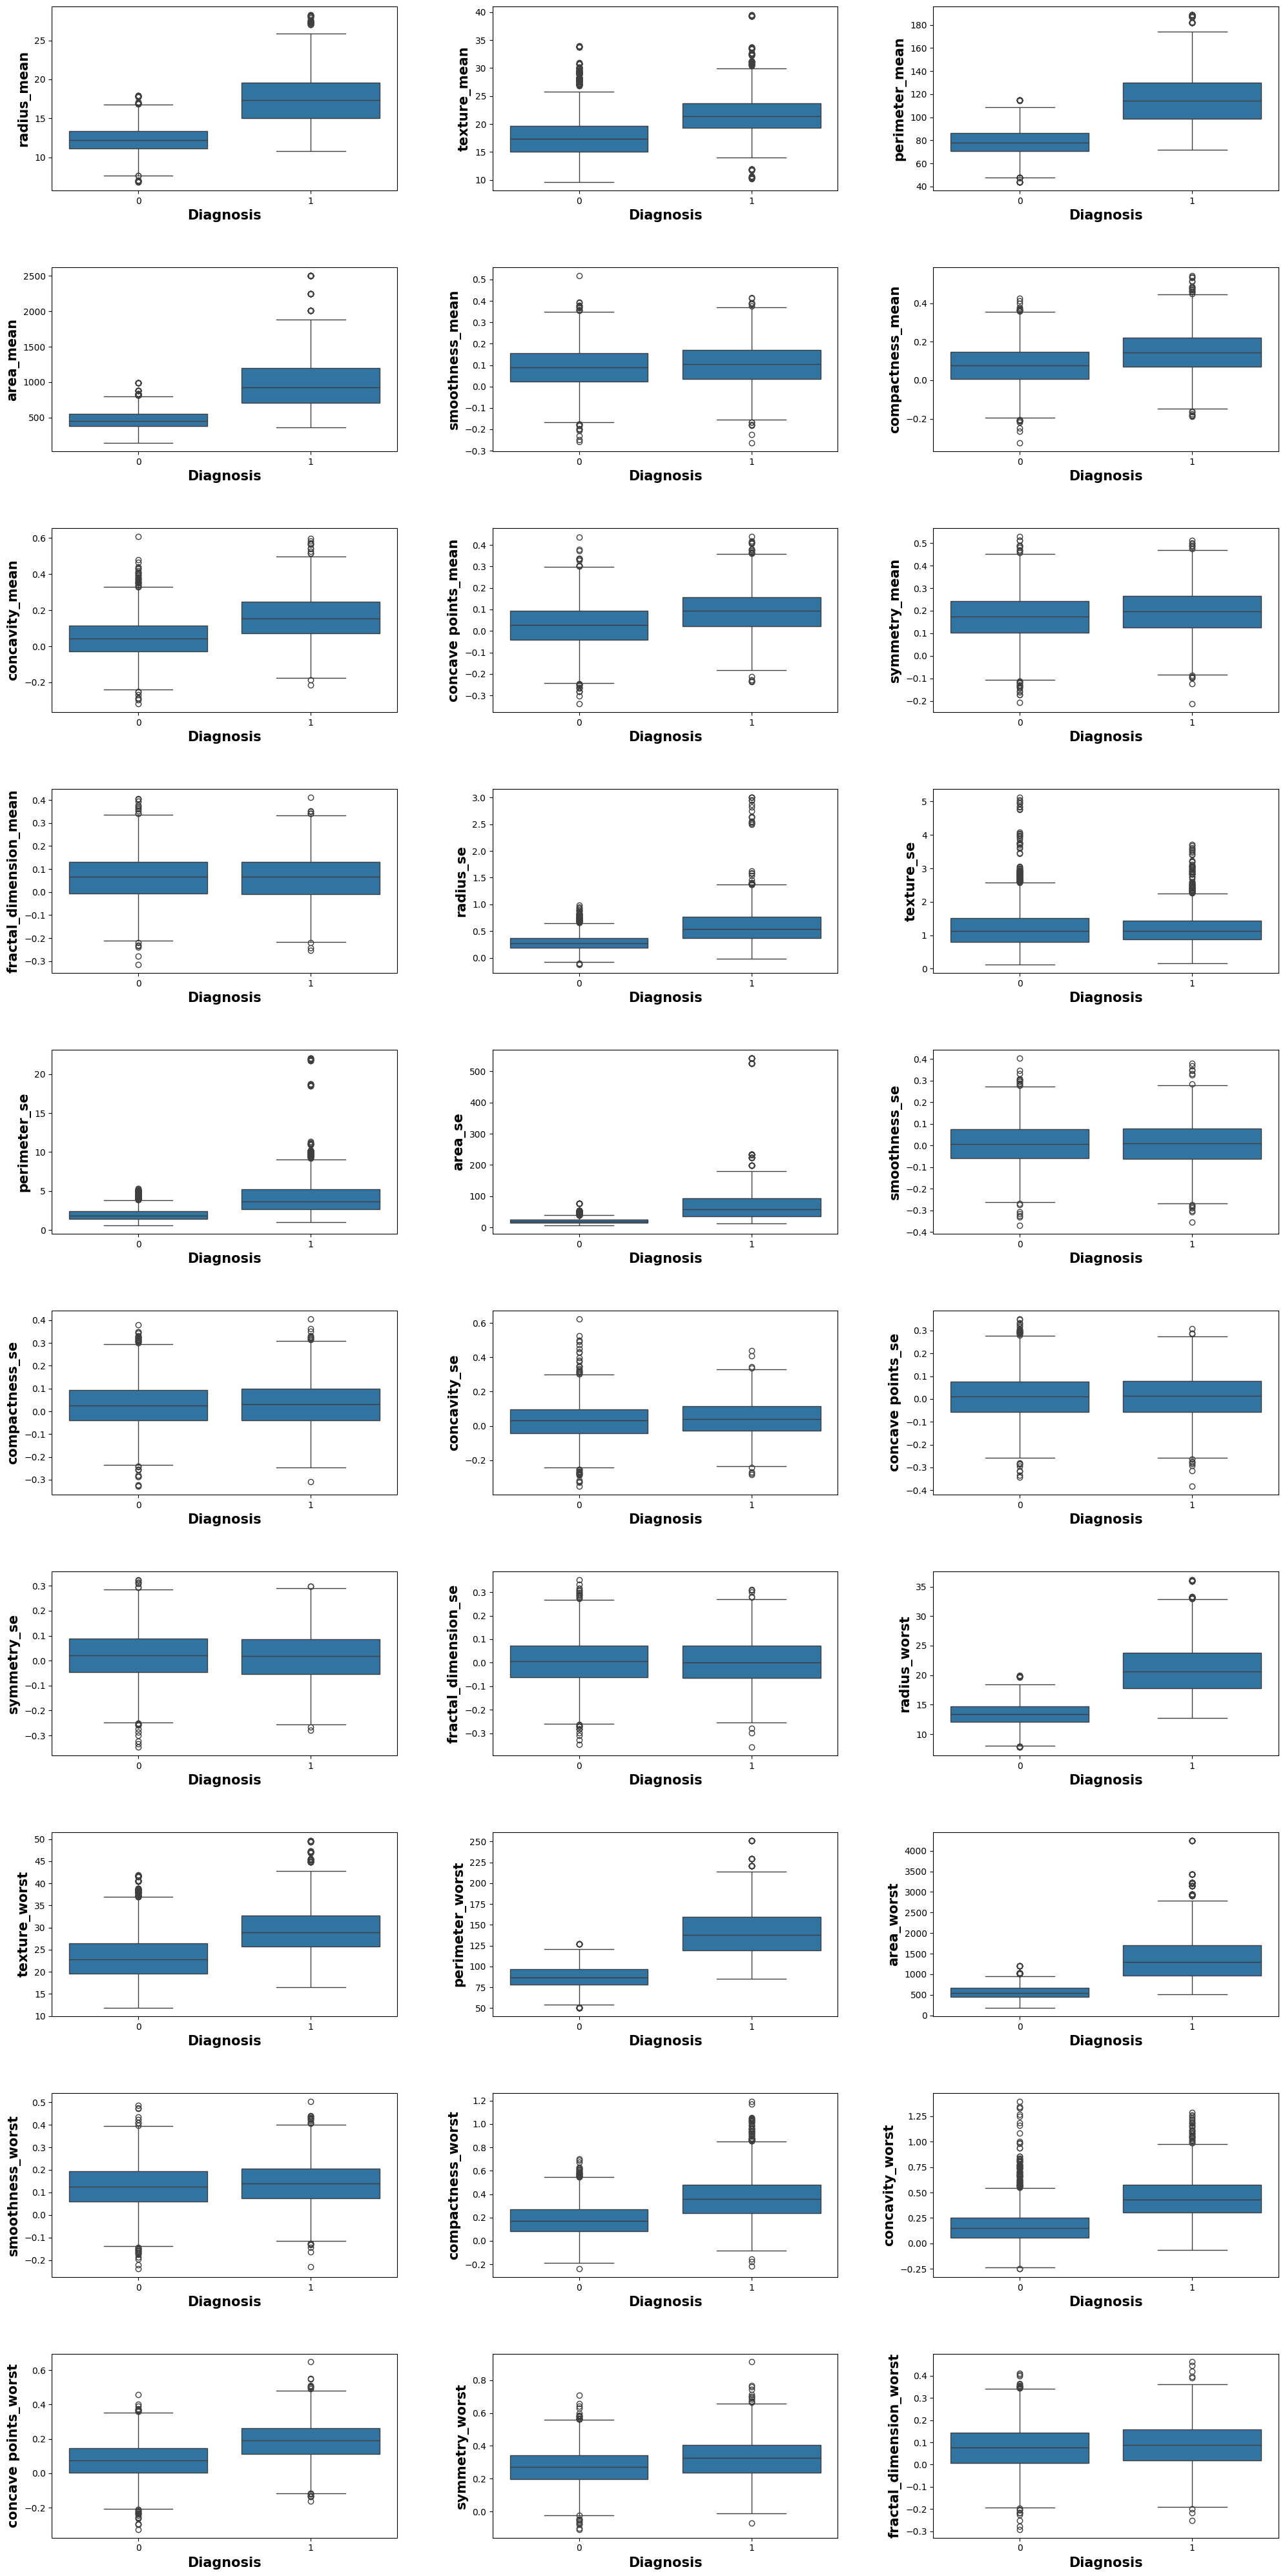

In [ ]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df.columns[1:]):
    sns.boxplot(x='diagnosis', y=col, data=df, ax=ax[i])
    ax[i].set_xlabel('Diagnosis', fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel(col, fontsize = 15, fontweight = 'bold')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

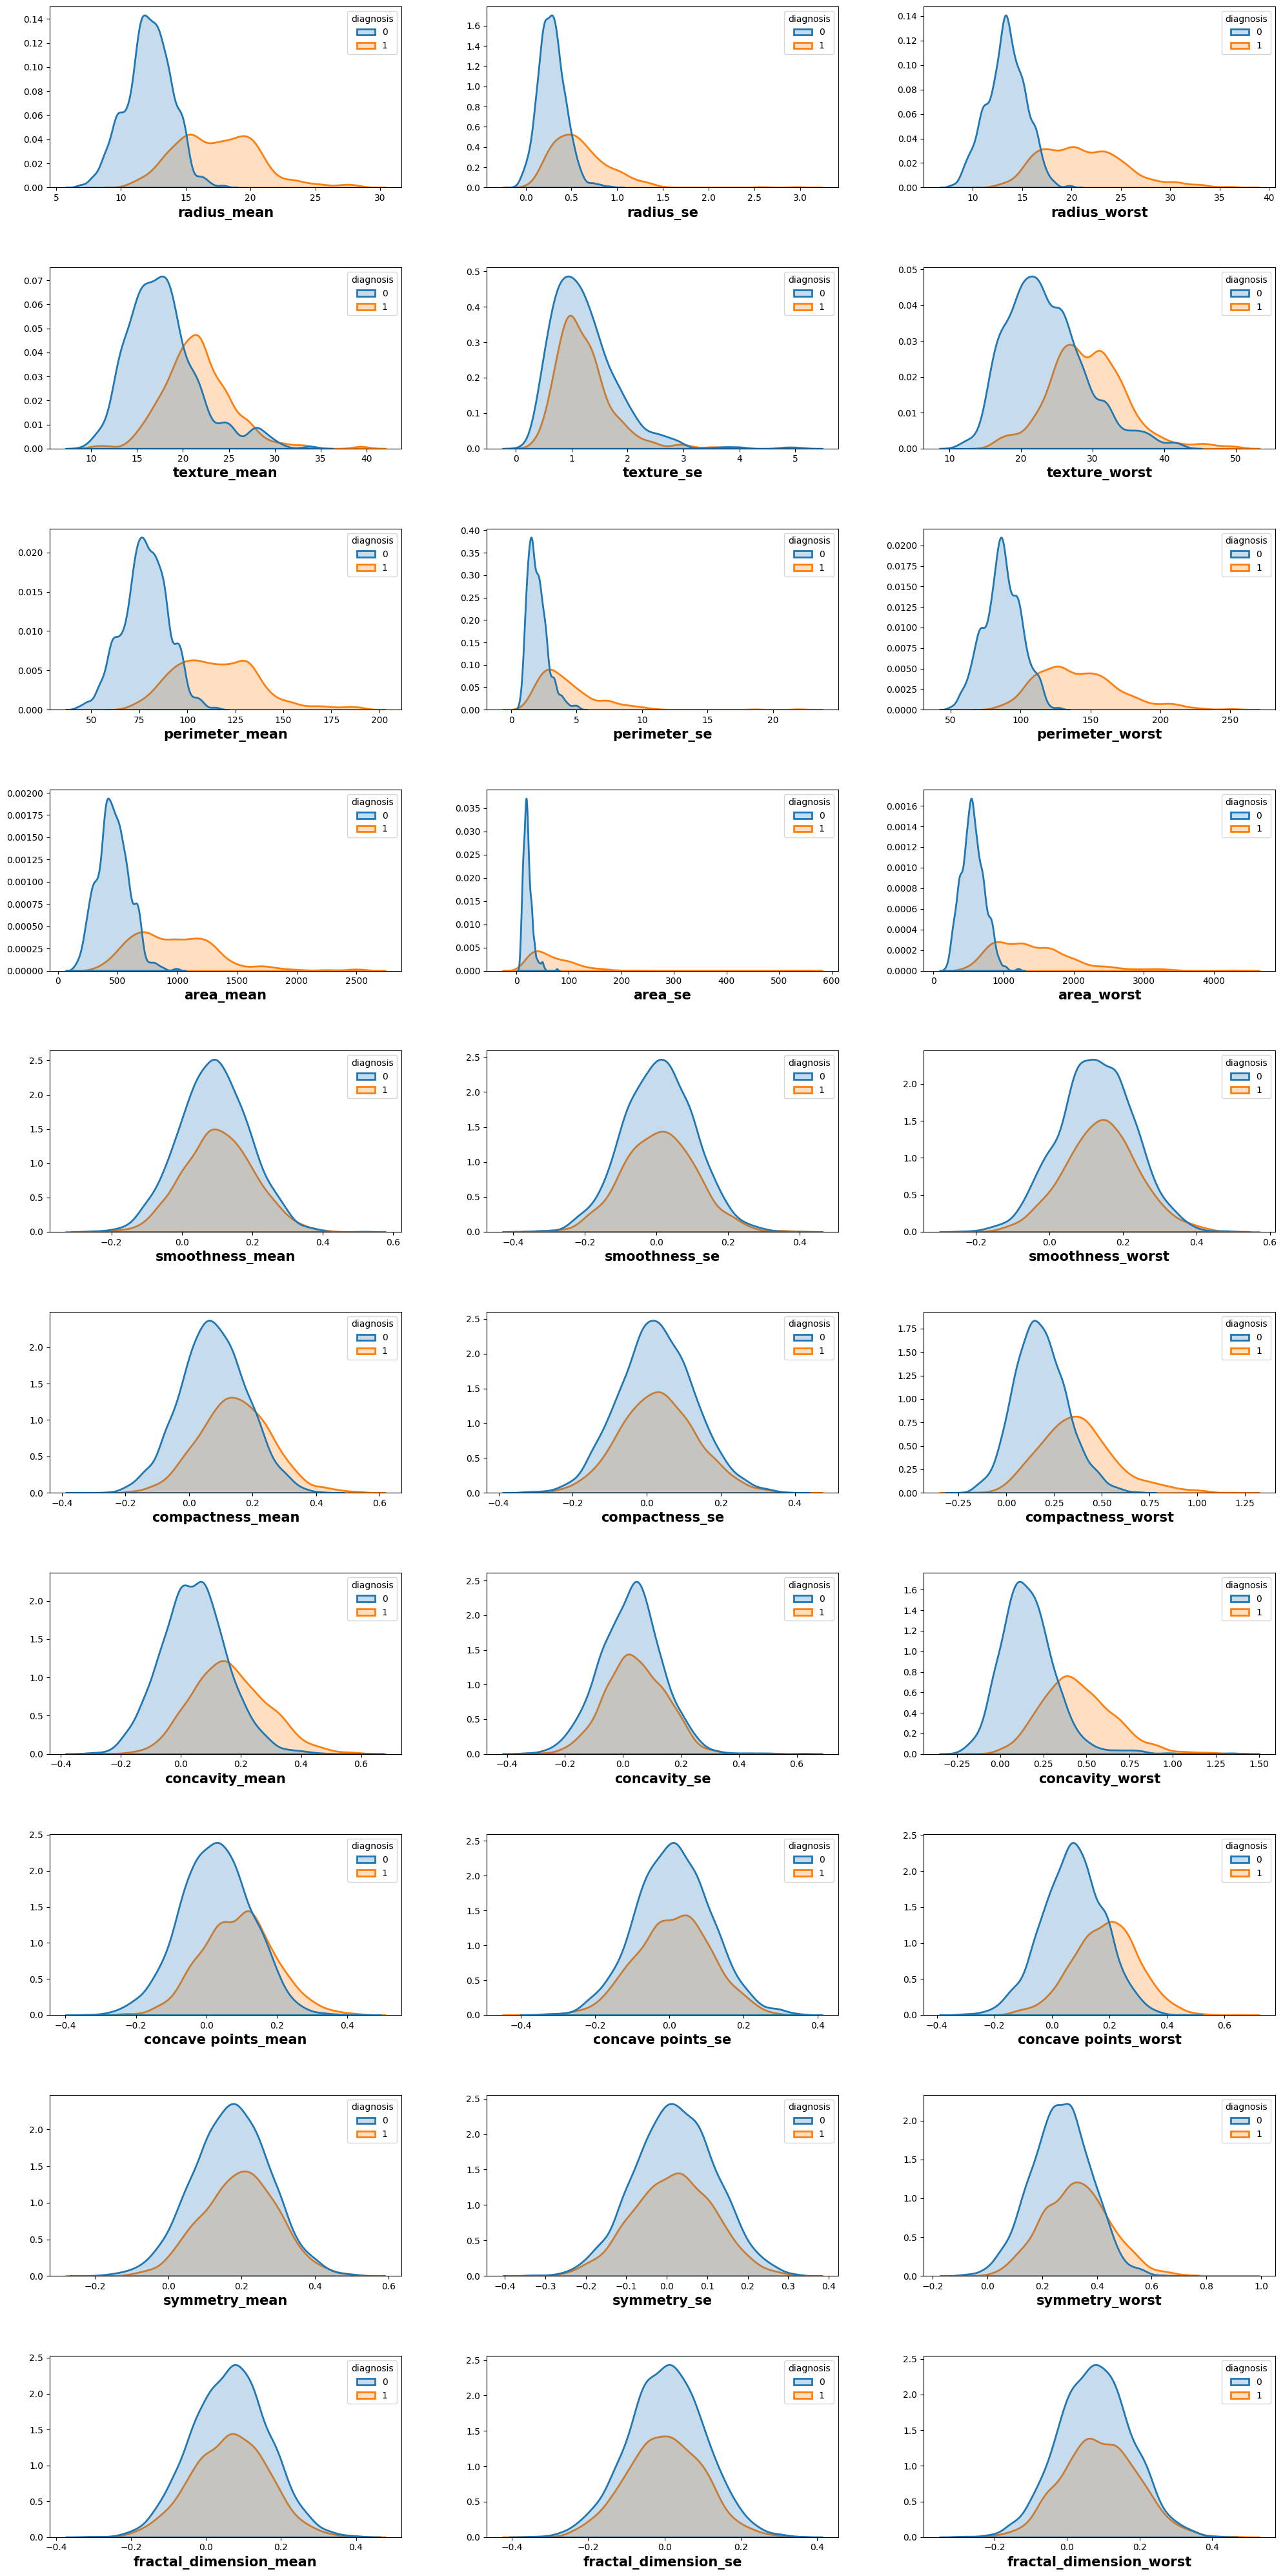

In [ ]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df_ordered.columns[1:]):
    sns.kdeplot(x=col, data=df_ordered, ax=ax[i], fill=True, lw=2, hue = 'diagnosis')
    ax[i].set_xlabel(col, fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel('')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

In [ ]:
df_ordered.select_dtypes(include='number')


,diagnosis,radius_mean,radius_se,radius_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,area_se,area_worst,smoothness_mean,smoothness_se,smoothness_worst,compactness_mean,compactness_se,compactness_worst,concavity_mean,concavity_se,concavity_worst,concave points_mean,concave points_se,concave points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,1,17.998968,0.973743,25.440416,10.565640,0.765052,17.224112,122.852200,8.560768,184.661651,1001.106710,153.418144,2019.152914,0.081984,-0.186312,0.246364,0.285834,0.217184,0.698641,0.398145,0.160208,0.738654,0.148971,-0.079299,0.066592,0.353091,-0.023415,0.457838,0.017206,0.005301,0.142958
1,1,20.511013,0.603223,24.826036,17.787839,0.656813,23.518646,132.954490,3.479828,158.844671,1325.823346,73.881462,1955.890927,0.245554,0.101236,0.004187,0.194282,-0.095907,0.143044,0.138061,0.143084,0.123242,0.181164,0.153995,0.460569,0.263240,0.024608,0.314415,-0.077472,0.000619,0.178515
2,1,19.763749,0.861760,23.533687,21.134635,0.757405,25.667160,129.917650,4.515927,152.490715,1202.924928,94.174936,1708.938861,0.216573,0.174298,0.203708,0.259434,0.114017,0.317832,0.131534,-0.002335,0.483000,0.167189,-0.112769,0.323903,0.242958,-0.119702,0.394406,0.173663,0.113259,0.042000
3,1,11.449166,0.222218,14.824450,20.516768,1.241904,26.557872,77.383695,3.513392,99.092503,385.991075,27.107167,567.891598,0.198868,-0.114500,0.192048,0.213599,0.247295,0.808203,0.087538,-0.047021,0.667493,0.080289,0.145091,0.332574,0.334566,-0.031787,0.567382,0.157591,0.164126,0.175874
4,1,20.354812,0.934170,22.513137,14.199572,0.611162,16.567093,135.217358,5.334372,152.203620,1296.950523,94.382490,1574.985822,0.115178,-0.116488,0.150841,0.119498,0.146142,0.184497,0.027547,0.225344,0.293628,0.023348,0.024724,0.290815,0.229555,0.075117,0.146084,0.070076,-0.065606,0.009563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,10.349859,0.200832,11.139863,18.329683,2.600902,23.443843,66.696672,1.178711,69.295723,340.913089,13.137245,366.390966,0.106189,-0.090648,-0.053727,0.008129,-0.024097,0.042773,-0.050550,0.037563,0.093308,-0.013094,0.085840,0.025134,0.141998,0.157519,0.222828,0.118298,0.064830,0.014817
4996,1,17.919459,0.137906,20.391404,16.772118,0.812812,22.287100,117.269841,1.831258,133.249123,990.102325,35.821865,1291.999985,0.062895,0.029305,0.159697,-0.030011,-0.112669,0.276758,0.217073,0.220136,0.460243,0.023926,-0.111599,0.148811,0.102955,-0.014339,0.197149,0.088434,-0.018654,0.148395
4997,0,11.763408,0.302958,12.990943,24.725117,1.113252,30.343478,77.635732,1.743645,84.395957,441.287241,19.488911,513.884716,-0.077594,0.001368,0.148669,0.228967,0.274512,0.241808,0.097245,0.057994,0.271441,0.021119,-0.066346,0.023034,0.217262,0.008137,0.337355,0.173088,-0.040811,0.031109
4998,1,17.753508,0.372184,21.571993,28.180264,1.032835,38.432182,117.175889,3.021769,145.495278,981.576127,43.985368,1436.962757,0.051318,-0.156189,0.138424,0.043784,0.113098,0.509288,0.033400,0.027275,0.567119,0.017686,0.093277,0.417551,0.175122,0.063672,0.315222,0.088245,-0.028422,-0.117340


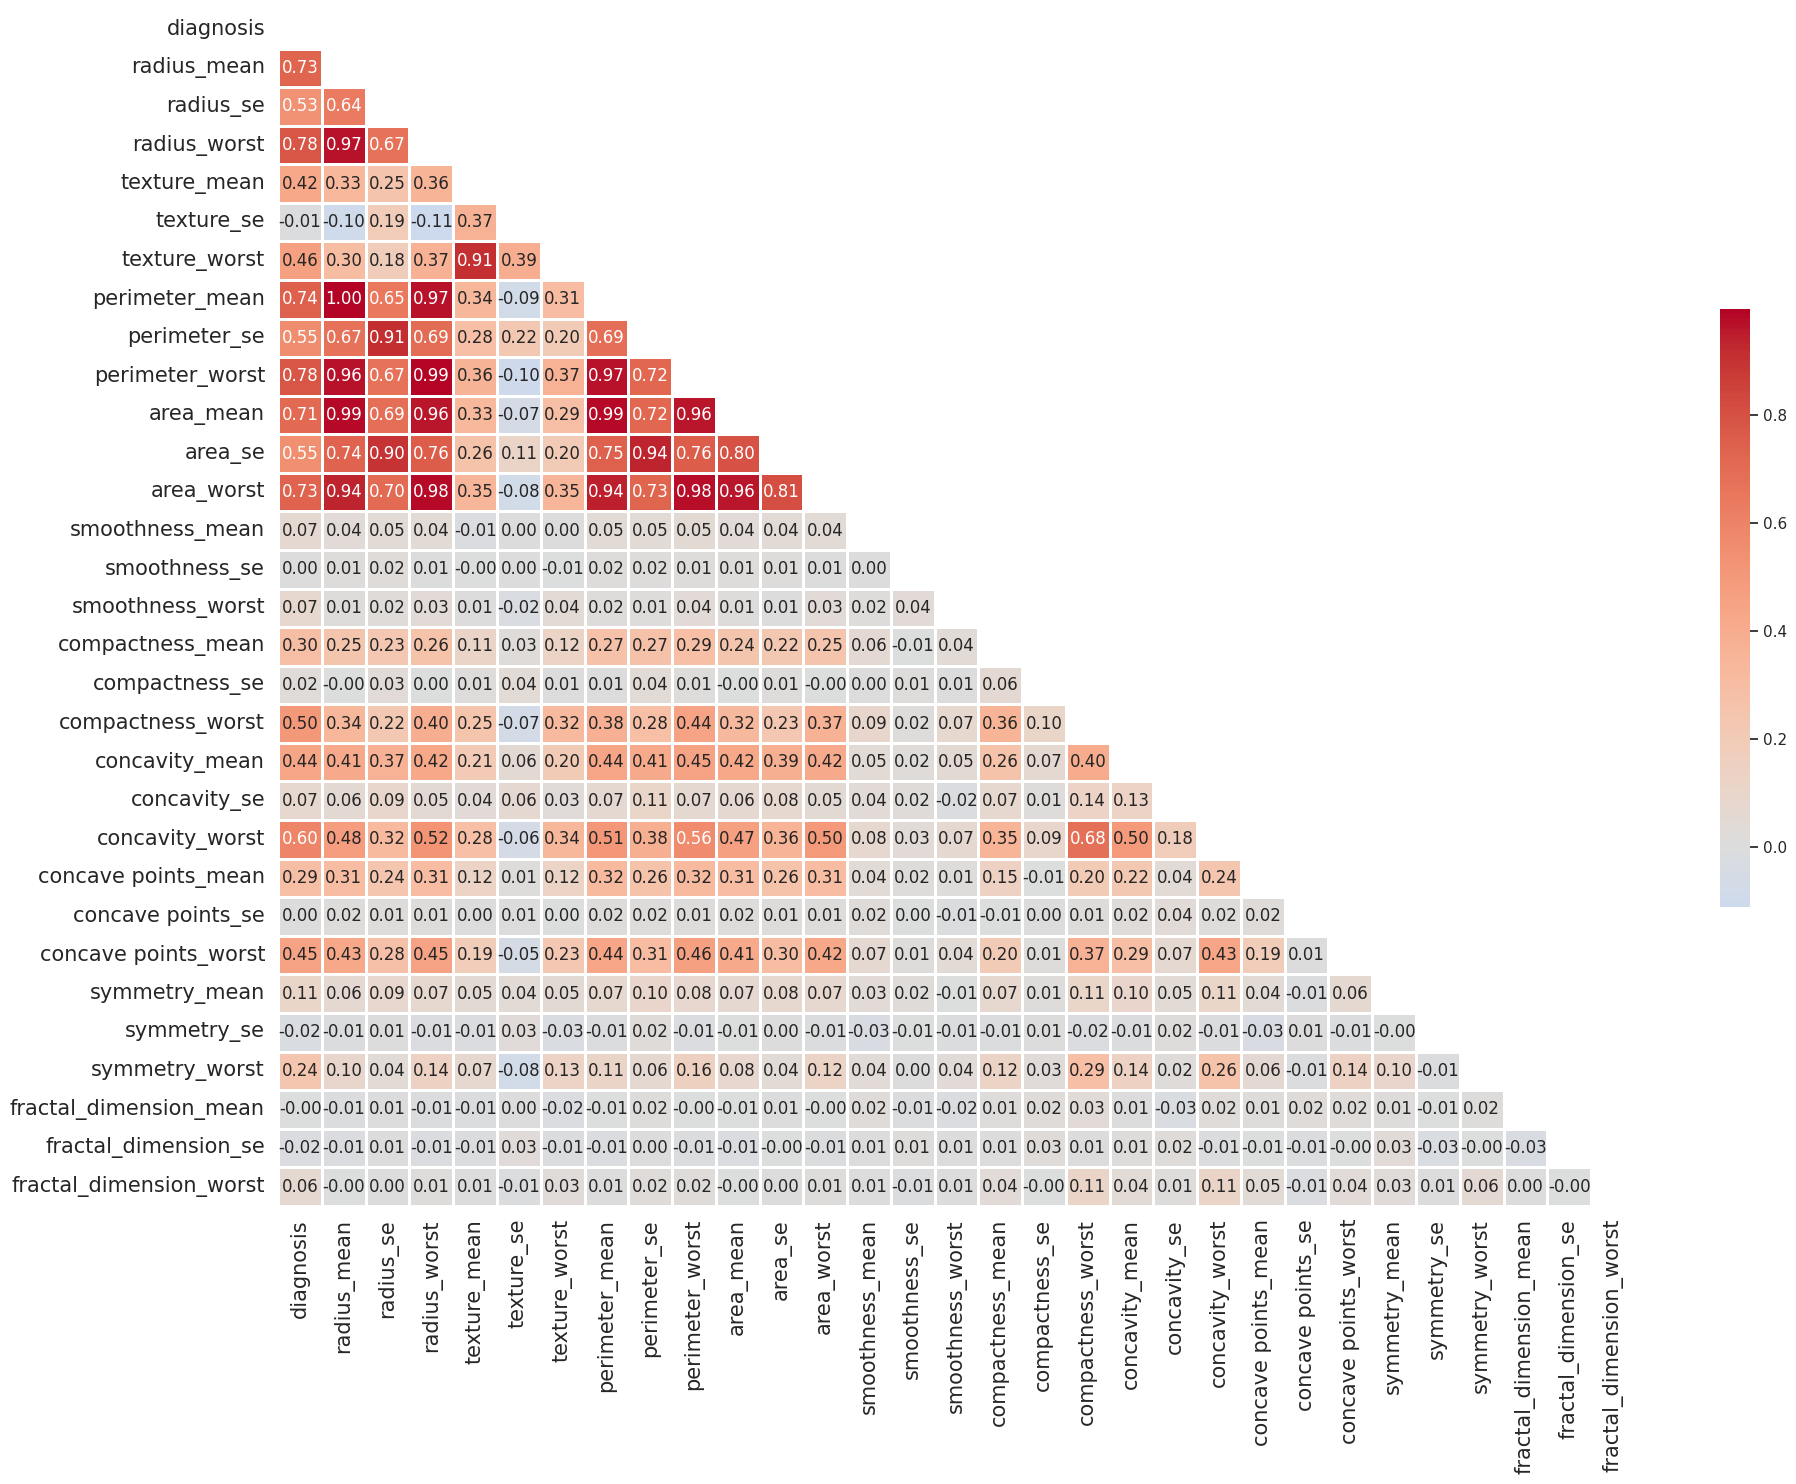

In [ ]:
sns.set_theme(style="white")

plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(df_ordered.select_dtypes(include="number").corr(), dtype=bool))
ax = sns.heatmap(df_ordered.select_dtypes(include="number").corr(), annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=1, linecolor='white', mask=mask, center=0, cbar_kws={"shrink": .5})

for label in ax.get_yticklabels():
    label.set_size(15)

for label in ax.get_xticklabels():
    label.set_size(15)

plt.tight_layout()
plt.show()

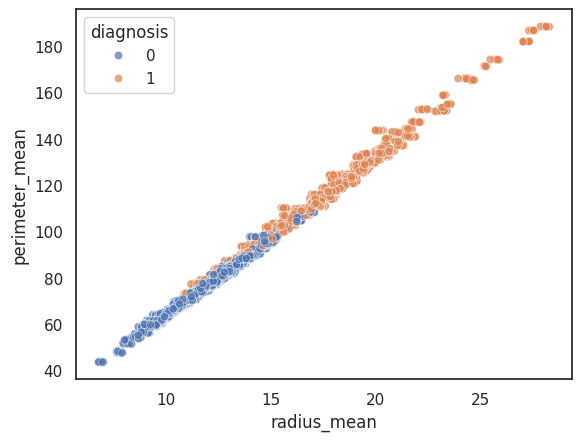

In [ ]:
sns.scatterplot(x='radius_mean', y='perimeter_mean', data=df_ordered, hue='diagnosis', alpha=0.7);

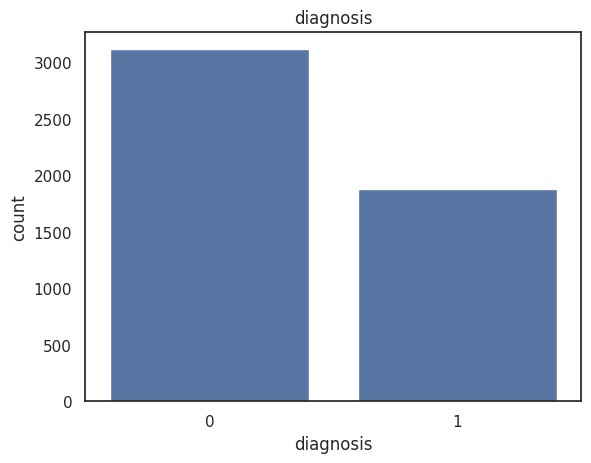

In [ ]:
sns.countplot(x=df['diagnosis'])
plt.title('diagnosis');

## Logistic Regression

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
df1 = pd.read_csv("/content/breast_cancer_data.csv")
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8.423020e+05,M,17.998968,10.565640,122.852200,1001.106710,0.081984,0.285834,0.398145,0.148971,0.353091,0.017206,0.973743,0.765052,8.560768,153.418144,-0.186312,0.217184,0.160208,-0.079299,-0.023415,0.005301,25.440416,17.224112,184.661651,2019.152914,0.246364,0.698641,0.738654,0.066592,0.457838,0.142958
1,8.425170e+05,M,20.511013,17.787839,132.954490,1325.823346,0.245554,0.194282,0.138061,0.181164,0.263240,-0.077472,0.603223,0.656813,3.479828,73.881462,0.101236,-0.095907,0.143084,0.153995,0.024608,0.000619,24.826036,23.518646,158.844671,1955.890927,0.004187,0.143044,0.123242,0.460569,0.314415,0.178515
2,8.430090e+07,M,19.763749,21.134635,129.917650,1202.924928,0.216573,0.259434,0.131534,0.167189,0.242958,0.173663,0.861760,0.757405,4.515927,94.174936,0.174298,0.114017,-0.002335,-0.112769,-0.119702,0.113259,23.533687,25.667160,152.490715,1708.938861,0.203708,0.317832,0.483000,0.323903,0.394406,0.042000
3,8.434830e+07,M,11.449166,20.516768,77.383695,385.991075,0.198868,0.213599,0.087538,0.080289,0.334566,0.157591,0.222218,1.241904,3.513392,27.107167,-0.114500,0.247295,-0.047021,0.145091,-0.031787,0.164126,14.824450,26.557872,99.092503,567.891598,0.192048,0.808203,0.667493,0.332574,0.567382,0.175874
4,8.435840e+07,M,20.354812,14.199572,135.217358,1296.950523,0.115178,0.119498,0.027547,0.023348,0.229555,0.070076,0.934170,0.611162,5.334372,94.382490,-0.116488,0.146142,0.225344,0.024724,0.075117,-0.065606,22.513137,16.567093,152.203620,1574.985822,0.150841,0.184497,0.293628,0.290815,0.146084,0.009563


In [ ]:
df1.drop('id', axis=1, inplace=True)

In [ ]:
df1['diagnosis'] = (df1['diagnosis'] == 'M').astype(int) #encode the label into 1/0
corr = df1.corr()

In [ ]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [ ]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.998968,10.565640,122.852200,1001.106710,0.081984,0.285834,0.398145,0.148971,0.353091,0.017206,0.973743,0.765052,8.560768,153.418144,-0.186312,0.217184,0.160208,-0.079299,-0.023415,0.005301,25.440416,17.224112,184.661651,2019.152914,0.246364,0.698641,0.738654,0.066592,0.457838,0.142958
1,1,20.511013,17.787839,132.954490,1325.823346,0.245554,0.194282,0.138061,0.181164,0.263240,-0.077472,0.603223,0.656813,3.479828,73.881462,0.101236,-0.095907,0.143084,0.153995,0.024608,0.000619,24.826036,23.518646,158.844671,1955.890927,0.004187,0.143044,0.123242,0.460569,0.314415,0.178515
2,1,19.763749,21.134635,129.917650,1202.924928,0.216573,0.259434,0.131534,0.167189,0.242958,0.173663,0.861760,0.757405,4.515927,94.174936,0.174298,0.114017,-0.002335,-0.112769,-0.119702,0.113259,23.533687,25.667160,152.490715,1708.938861,0.203708,0.317832,0.483000,0.323903,0.394406,0.042000
3,1,11.449166,20.516768,77.383695,385.991075,0.198868,0.213599,0.087538,0.080289,0.334566,0.157591,0.222218,1.241904,3.513392,27.107167,-0.114500,0.247295,-0.047021,0.145091,-0.031787,0.164126,14.824450,26.557872,99.092503,567.891598,0.192048,0.808203,0.667493,0.332574,0.567382,0.175874
4,1,20.354812,14.199572,135.217358,1296.950523,0.115178,0.119498,0.027547,0.023348,0.229555,0.070076,0.934170,0.611162,5.334372,94.382490,-0.116488,0.146142,0.225344,0.024724,0.075117,-0.065606,22.513137,16.567093,152.203620,1574.985822,0.150841,0.184497,0.293628,0.290815,0.146084,0.009563


In [ ]:
X1 = df1[names]
y1 = df1['diagnosis']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=42)

In [ ]:
scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X1_train) # fit it to the training data

X1_train = scaler.transform(X1_train) #transform training data
X1_test = scaler.transform(X1_test) #transform validation data

In [ ]:
LR_MODEL = LogisticRegression()

In [ ]:
LR_MODEL.fit(X1_train, y1_train)

LogisticRegression()

In [ ]:
predictions = LR_MODEL.predict(X1_test)
#compute metrics for evaluation
accuracy = accuracy_score(y1_test, predictions)
print(f'the model accuracy: {accuracy}')

the model accuracy: 0.954


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df2 = df.copy()

In [ ]:
X2=df2.drop(columns='diagnosis')
y2=df2['diagnosis']
y2

0       1
1       1
2       1
3       1
4       1
       ..
4995    0
4996    1
4997    0
4998    1
4999    0
Name: diagnosis, Length: 5000, dtype: int64

In [ ]:
X2=pd.get_dummies(X2,dtype=float,drop_first=True)
X2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.998968,10.565640,122.852200,1001.106710,0.081984,0.285834,0.398145,0.148971,0.353091,0.017206,0.973743,0.765052,8.560768,153.418144,-0.186312,0.217184,0.160208,-0.079299,-0.023415,0.005301,25.440416,17.224112,184.661651,2019.152914,0.246364,0.698641,0.738654,0.066592,0.457838,0.142958
1,20.511013,17.787839,132.954490,1325.823346,0.245554,0.194282,0.138061,0.181164,0.263240,-0.077472,0.603223,0.656813,3.479828,73.881462,0.101236,-0.095907,0.143084,0.153995,0.024608,0.000619,24.826036,23.518646,158.844671,1955.890927,0.004187,0.143044,0.123242,0.460569,0.314415,0.178515
2,19.763749,21.134635,129.917650,1202.924928,0.216573,0.259434,0.131534,0.167189,0.242958,0.173663,0.861760,0.757405,4.515927,94.174936,0.174298,0.114017,-0.002335,-0.112769,-0.119702,0.113259,23.533687,25.667160,152.490715,1708.938861,0.203708,0.317832,0.483000,0.323903,0.394406,0.042000
3,11.449166,20.516768,77.383695,385.991075,0.198868,0.213599,0.087538,0.080289,0.334566,0.157591,0.222218,1.241904,3.513392,27.107167,-0.114500,0.247295,-0.047021,0.145091,-0.031787,0.164126,14.824450,26.557872,99.092503,567.891598,0.192048,0.808203,0.667493,0.332574,0.567382,0.175874
4,20.354812,14.199572,135.217358,1296.950523,0.115178,0.119498,0.027547,0.023348,0.229555,0.070076,0.934170,0.611162,5.334372,94.382490,-0.116488,0.146142,0.225344,0.024724,0.075117,-0.065606,22.513137,16.567093,152.203620,1574.985822,0.150841,0.184497,0.293628,0.290815,0.146084,0.009563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10.349859,18.329683,66.696672,340.913089,0.106189,0.008129,-0.050550,-0.013094,0.141998,0.118298,0.200832,2.600902,1.178711,13.137245,-0.090648,-0.024097,0.037563,0.085840,0.157519,0.064830,11.139863,23.443843,69.295723,366.390966,-0.053727,0.042773,0.093308,0.025134,0.222828,0.014817
4996,17.919459,16.772118,117.269841,990.102325,0.062895,-0.030011,0.217073,0.023926,0.102955,0.088434,0.137906,0.812812,1.831258,35.821865,0.029305,-0.112669,0.220136,-0.111599,-0.014339,-0.018654,20.391404,22.287100,133.249123,1291.999985,0.159697,0.276758,0.460243,0.148811,0.197149,0.148395
4997,11.763408,24.725117,77.635732,441.287241,-0.077594,0.228967,0.097245,0.021119,0.217262,0.173088,0.302958,1.113252,1.743645,19.488911,0.001368,0.274512,0.057994,-0.066346,0.008137,-0.040811,12.990943,30.343478,84.395957,513.884716,0.148669,0.241808,0.271441,0.023034,0.337355,0.031109
4998,17.753508,28.180264,117.175889,981.576127,0.051318,0.043784,0.033400,0.017686,0.175122,0.088245,0.372184,1.032835,3.021769,43.985368,-0.156189,0.113098,0.027275,0.093277,0.063672,-0.028422,21.571993,38.432182,145.495278,1436.962757,0.138424,0.509288,0.567119,0.417551,0.315222,-0.117340


In [ ]:
df2['diagnosis'].value_counts()

0    3120
1    1880
Name: diagnosis, dtype: int64

In [ ]:
X2_train , X2_test , y2_train , y2_test = train_test_split(X2 , y2 , test_size=0.2 , random_state=42)

In [ ]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X2_train , y2_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
DT_model.score(X2_test , y2_test)

0.994

In [ ]:
DT_pred=DT_model.predict(X2_test)

In [ ]:
DT2_acc = accuracy_score(y2_test ,DT_pred )
DT2_acc

0.994

In [ ]:
print(classification_report(y2_test , DT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       629
           1       0.99      0.99      0.99       371

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



Text(91.25, 0.5, 'True Value')

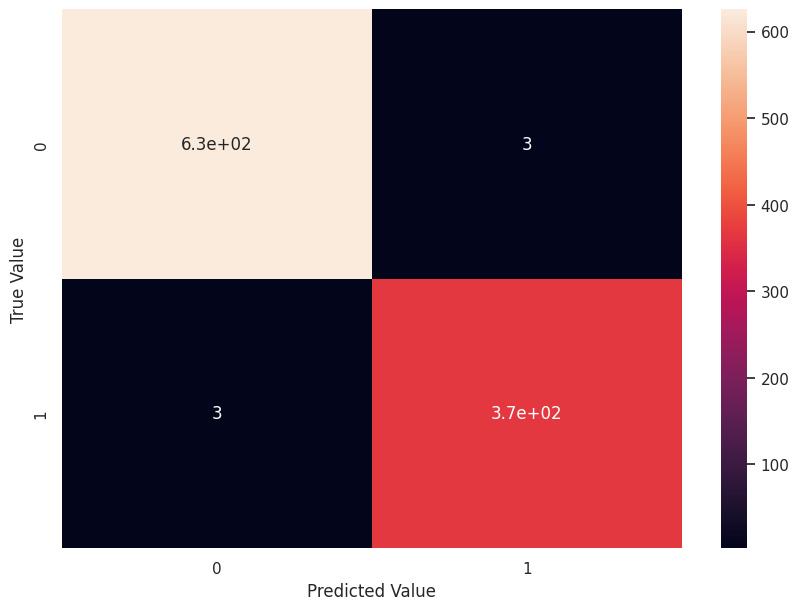

In [ ]:
cm2 = confusion_matrix(y2_test,DT_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

As the model was overfitted, we made some purning changes in the parameters, that reduced the accuracy

In [ ]:
# Initialize the Decision Tree Classifier with pruning parameters
DT_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

In [ ]:
DT_model.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
DT_pred = DT_model.predict(X2_test)
DT2_acc = accuracy_score(y2_test, DT_pred)
print("Accuracy:", DT2_acc)

Accuracy: 0.978


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       629
           1       0.99      0.95      0.97       371

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.98      0.98      0.98      1000



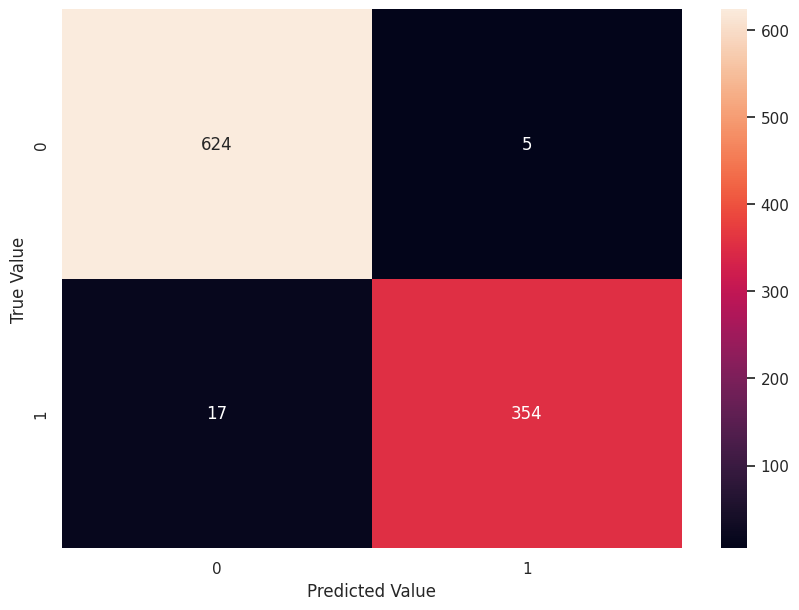

In [ ]:
# Print classification report
print(classification_report(y2_test, DT_pred))

# Plot confusion matrix
cm2 = confusion_matrix(y2_test, DT_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

##Random Forest

In [ ]:
df3 = df.copy()

In [ ]:
 X3= df3.drop("diagnosis", axis=1)
y3 = df3["diagnosis"]
y3.tail()

4995    0
4996    1
4997    0
4998    1
4999    0
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

GridSearchCV is a technique used for hyperparameter tuning in machine learning. It is a method to systematically search for the optimal hyperparameters for a given model.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

param_grid = {
    "n_estimators": [50, 100, 150, 200,250, 300],
}

gscv = GridSearchCV(rf, param_grid, cv = 5, scoring="accuracy")
gscv.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='accuracy')

In [ ]:
print("Best Params: ", gscv.best_params_)
print("Best Score: ", gscv.best_score_)

Best Params:  {'n_estimators': 50}
Best Score:  0.99175


In [ ]:
y3_pred = gscv.predict(X3_test)
y3_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,

Score: 0.988
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       629
           1       0.99      0.98      0.98       371

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



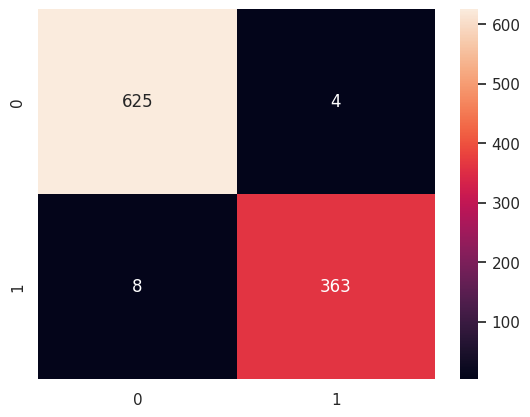

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Calculate accuracy score
score = accuracy_score(y3_test, y3_pred)

# Generate confusion matrix
cm = confusion_matrix(y3_test, y3_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Print accuracy score
print("Score:", score)

# Print classification report
print(classification_report(y3_test, y3_pred))



Since, it is overfitted, we'll be reducing the param passed from 6 to 3 and train the model again.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the range of parameters for GridSearchCV
param_grid = {
    "n_estimators": [10, 50, 100],  # Reduce the number of trees
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV with reduced parameters
gscv = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy")
gscv.fit(X3_train, y3_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 50, 100]}, scoring='accuracy')

In [ ]:

# Get the best parameters and best score
best_params = gscv.best_params_
best_score = gscv.best_score_

# Initialize the RandomForestClassifier with the best parameters
rf_adjusted = RandomForestClassifier(n_estimators=best_params['n_estimators'], random_state=42)

# Fit the adjusted model
rf_adjusted.fit(X3_train, y3_train)

RandomForestClassifier(random_state=42)

In [ ]:

# Predict the target values using the adjusted model
y3_pred_adjusted = rf_adjusted.predict(X3_test)

# Calculate accuracy score for the adjusted model
score_adjusted = accuracy_score(y3_test, y3_pred_adjusted)

# Generate confusion matrix for the adjusted model
cm_adjusted = confusion_matrix(y3_test, y3_pred_adjusted)

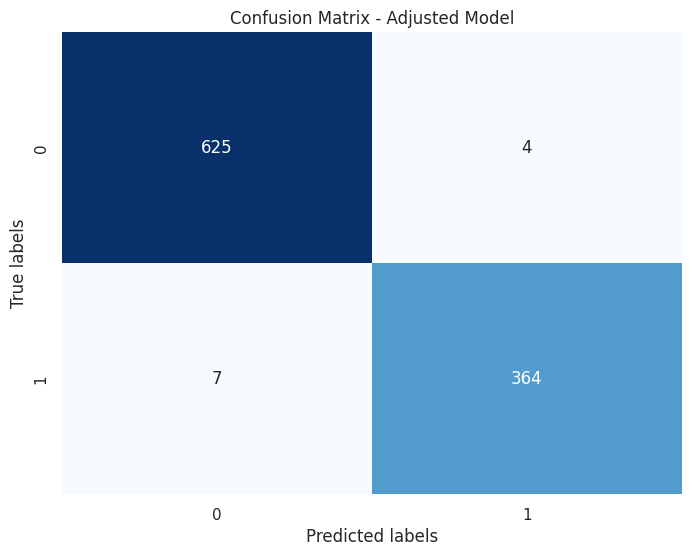

Adjusted Model Score: 0.989
Classification Report - Adjusted Model:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       629
           1       0.99      0.98      0.99       371

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:

# Plot confusion matrix as heatmap for the adjusted model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Adjusted Model')
plt.show()

# Print accuracy score for the adjusted model
print("Adjusted Model Score:", score_adjusted)

# Print classification report for the adjusted model
print("Classification Report - Adjusted Model:\n", classification_report(y3_test, y3_pred_adjusted))


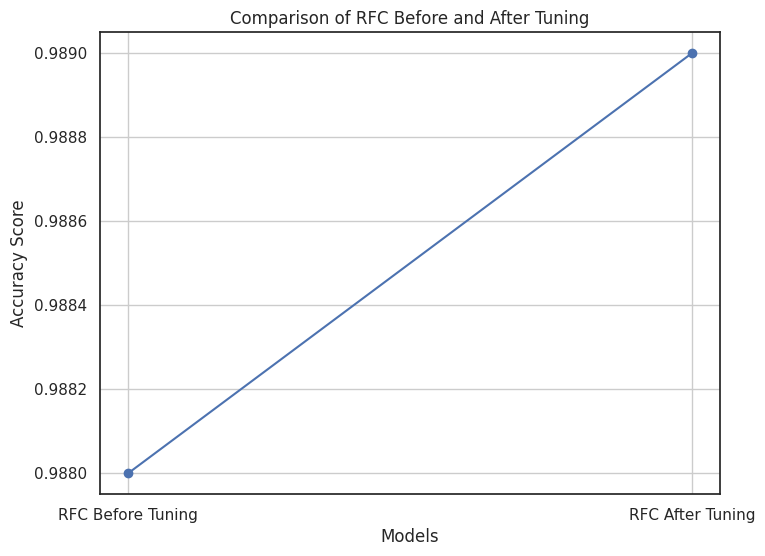

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores of RFC models before and after hyperparameter tuning
accuracy_scores = [score, score_adjusted]

# Labels for the x-axis (model names)
models = ['RFC Before Tuning', 'RFC After Tuning']

# Create a line graph
plt.figure(figsize=(8, 6))
plt.plot(models, accuracy_scores, marker='o', color='b', linestyle='-')

# Add title and labels
plt.title('Comparison of RFC Before and After Tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

# Show grid
plt.grid(True)

# Show plot
plt.show()


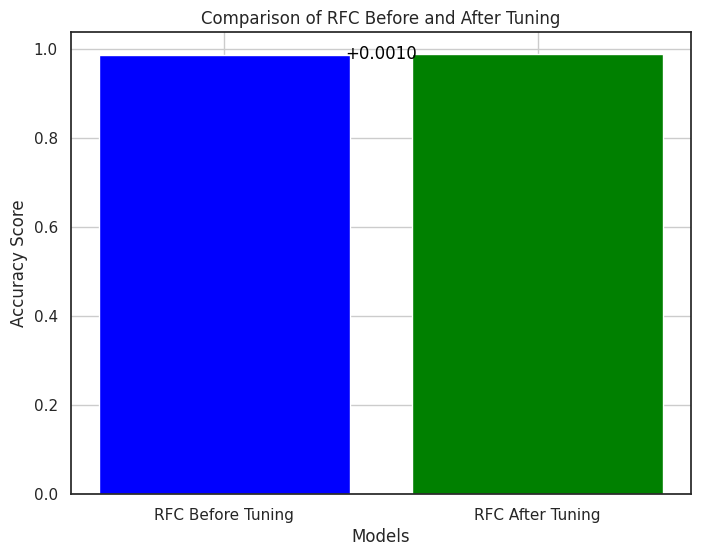

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores of RFC models before and after hyperparameter tuning
accuracy_scores = [score, score_adjusted]

# Labels for the x-axis (model names)
models = ['RFC Before Tuning', 'RFC After Tuning']

# Calculate the difference in accuracy scores
accuracy_difference = score_adjusted - score

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green'])

# Add title and labels
plt.title('Comparison of RFC Before and After Tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

# Add text annotation for accuracy difference
plt.text(0.5, score_adjusted - 0.01, f'+{accuracy_difference:.4f}', ha='center', color='black', fontsize=12)

# Show grid
plt.grid(True)

# Show plot
plt.show()


##SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import *

In [ ]:
df4 = df.copy()

In [ ]:
X4=df4.drop(columns='diagnosis')
y4=df4['diagnosis']
y4

0       1
1       1
2       1
3       1
4       1
       ..
4995    0
4996    1
4997    0
4998    1
4999    0
Name: diagnosis, Length: 5000, dtype: int64

In [ ]:
X4_train , X4_test , y4_train , y4_test = train_test_split(X4 , y4 , test_size=0.2 , random_state=42)

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X4_train,y4_train)
y4_train_pred=svc.predict(X4_train)
y4_test_pred=svc.predict(X4_test)

print(accuracy_score(y4_train,y4_train_pred))
print(accuracy_score(y4_test,y4_test_pred))

0.96975
0.958


In [ ]:
svc.score(X4_test , y4_test)

0.958

In [ ]:
svc_pred=svc.predict(X4_test)

In [ ]:
svc_acc = accuracy_score(y4_test ,svc_pred )
svc_acc

0.958

In [ ]:
print(classification_report(y4_test , svc_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       629
           1       0.94      0.95      0.94       371

    accuracy                           0.96      1000
   macro avg       0.95      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



Text(91.25, 0.5, 'True Value')

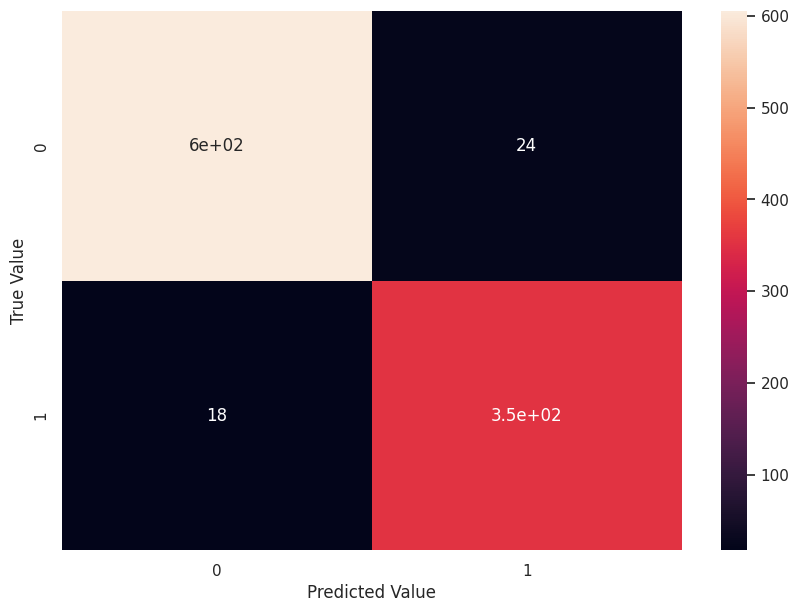

In [ ]:
cm4 = confusion_matrix(y4_test,svc_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm4,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [ ]:
print("For training dataset:")
print(confusion_matrix(y4_train,y4_train_pred))
print("For testing dataset: ")
print(confusion_matrix(y4_test,y4_test_pred))

For training dataset:
[[2436   55]
 [  66 1443]]
For testing dataset: 
[[605  24]
 [ 18 353]]


In [ ]:
print("For training dataset:")
print(classification_report(y4_train,y4_train_pred))
print("For testing dataset: ")
print(classification_report(y4_test,y4_test_pred))

For training dataset:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2491
           1       0.96      0.96      0.96      1509

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

For testing dataset: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       629
           1       0.94      0.95      0.94       371

    accuracy                           0.96      1000
   macro avg       0.95      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



##Gradient Boosting


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df5 = pd.read_csv('/content/breast_cancer_data.csv')

df5.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8.423020e+05,M,17.998968,10.565640,122.852200,1001.106710,0.081984,0.285834,0.398145,0.148971,0.353091,0.017206,0.973743,0.765052,8.560768,153.418144,-0.186312,0.217184,0.160208,-0.079299,-0.023415,0.005301,25.440416,17.224112,184.661651,2019.152914,0.246364,0.698641,0.738654,0.066592,0.457838,0.142958
1,8.425170e+05,M,20.511013,17.787839,132.954490,1325.823346,0.245554,0.194282,0.138061,0.181164,0.263240,-0.077472,0.603223,0.656813,3.479828,73.881462,0.101236,-0.095907,0.143084,0.153995,0.024608,0.000619,24.826036,23.518646,158.844671,1955.890927,0.004187,0.143044,0.123242,0.460569,0.314415,0.178515
2,8.430090e+07,M,19.763749,21.134635,129.917650,1202.924928,0.216573,0.259434,0.131534,0.167189,0.242958,0.173663,0.861760,0.757405,4.515927,94.174936,0.174298,0.114017,-0.002335,-0.112769,-0.119702,0.113259,23.533687,25.667160,152.490715,1708.938861,0.203708,0.317832,0.483000,0.323903,0.394406,0.042000
3,8.434830e+07,M,11.449166,20.516768,77.383695,385.991075,0.198868,0.213599,0.087538,0.080289,0.334566,0.157591,0.222218,1.241904,3.513392,27.107167,-0.114500,0.247295,-0.047021,0.145091,-0.031787,0.164126,14.824450,26.557872,99.092503,567.891598,0.192048,0.808203,0.667493,0.332574,0.567382,0.175874
4,8.435840e+07,M,20.354812,14.199572,135.217358,1296.950523,0.115178,0.119498,0.027547,0.023348,0.229555,0.070076,0.934170,0.611162,5.334372,94.382490,-0.116488,0.146142,0.225344,0.024724,0.075117,-0.065606,22.513137,16.567093,152.203620,1574.985822,0.150841,0.184497,0.293628,0.290815,0.146084,0.009563


In [ ]:
X5 = df5.drop(columns=['diagnosis', 'id'])  # Assuming 'id' column is present
y5 = df5['diagnosis']

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
gb_classifier.fit(X5_train, y5_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y5_pred = gb_classifier.predict(X5_test)

In [ ]:
accuracy = accuracy_score(y5_test, y5_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y5_test, y5_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y5_test, y5_pred))

Accuracy: 0.988

Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.99      0.99       629
           M       0.98      0.98      0.98       371

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


Confusion Matrix:
[[623   6]
 [  6 365]]


This code will create a bar chart showing the feature importances of the Gradient Boosting Classifier model. It helps visualize which features are most important for predicting the target variable.

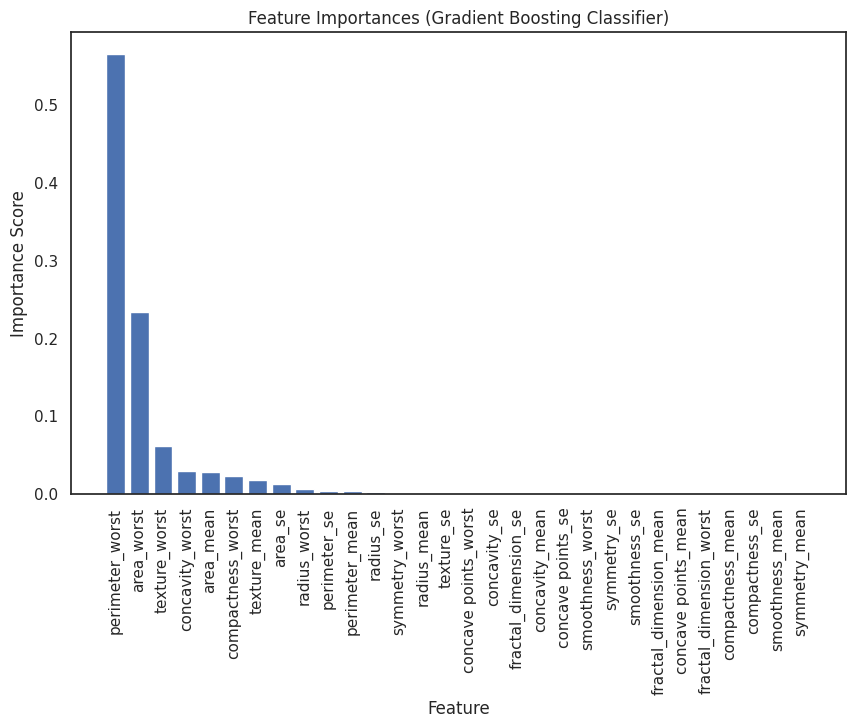

In [ ]:
importances = gb_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get names of features
feature_names = X5.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X5.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X5.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances (Gradient Boosting Classifier)')
plt.show()


## XGB

In [ ]:
!pip install xgboost scikit-optimize scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from time import time
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ML
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier, DMatrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [ ]:
df6=df.copy()

In [ ]:
df6.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8.423020e+05,M,17.998968,10.565640,122.852200,1001.106710,0.081984,0.285834,0.398145,0.148971,0.353091,0.017206,0.973743,0.765052,8.560768,153.418144,-0.186312,0.217184,0.160208,-0.079299,-0.023415,0.005301,25.440416,17.224112,184.661651,2019.152914,0.246364,0.698641,0.738654,0.066592,0.457838,0.142958
1,8.425170e+05,M,20.511013,17.787839,132.954490,1325.823346,0.245554,0.194282,0.138061,0.181164,0.263240,-0.077472,0.603223,0.656813,3.479828,73.881462,0.101236,-0.095907,0.143084,0.153995,0.024608,0.000619,24.826036,23.518646,158.844671,1955.890927,0.004187,0.143044,0.123242,0.460569,0.314415,0.178515
2,8.430090e+07,M,19.763749,21.134635,129.917650,1202.924928,0.216573,0.259434,0.131534,0.167189,0.242958,0.173663,0.861760,0.757405,4.515927,94.174936,0.174298,0.114017,-0.002335,-0.112769,-0.119702,0.113259,23.533687,25.667160,152.490715,1708.938861,0.203708,0.317832,0.483000,0.323903,0.394406,0.042000
3,8.434830e+07,M,11.449166,20.516768,77.383695,385.991075,0.198868,0.213599,0.087538,0.080289,0.334566,0.157591,0.222218,1.241904,3.513392,27.107167,-0.114500,0.247295,-0.047021,0.145091,-0.031787,0.164126,14.824450,26.557872,99.092503,567.891598,0.192048,0.808203,0.667493,0.332574,0.567382,0.175874
4,8.435840e+07,M,20.354812,14.199572,135.217358,1296.950523,0.115178,0.119498,0.027547,0.023348,0.229555,0.070076,0.934170,0.611162,5.334372,94.382490,-0.116488,0.146142,0.225344,0.024724,0.075117,-0.065606,22.513137,16.567093,152.203620,1574.985822,0.150841,0.184497,0.293628,0.290815,0.146084,0.009563


In [ ]:
X6 = df6.drop(['id', 'diagnosis'], axis=1).values
y6 = df6.diagnosis.values

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode string labels into numerical labels
y6_encoded = label_encoder.fit_transform(y6)

In [ ]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6_encoded, test_size=0.2, random_state=42)

In [ ]:
# XGBoost classifier base model
xgb_clf = xgb.XGBClassifier(
    n_jobs = 1,
    booster = 'gbtree',
    objective = 'binary:logistic',
    eval_metric = 'auc',
    tree_method='gpu_hist',
    enable_categorical = True,
    early_stopping_rounds = 5,
    verbosity = 0,
    min_child_weight = 1  # Correct parameter name
)

In [ ]:
# Define search space
search_spaces = {
     'learning_rate': Real(0.01, 1.0, 'log-uniform'),
     'max_depth': Integer(2, 20),
     'min-child-weight': Integer(1, 5),
     'reg_lambda': Real(1e-9, 100., 'log-uniform'),
     'reg_alpha': Real(1e-9, 100., 'log-uniform'),
     'gamma': Real(1e-9, 0.5, 'log-uniform'),
     'n_estimators': Integer(10, 5000)
}

In [ ]:
# Create Bayesian CV for HP optimization
bayes_cv = BayesSearchCV(
                    estimator = xgb_clf,
                    search_spaces = search_spaces,
                    scoring = 'roc_auc',
                    cv = StratifiedKFold(n_splits=5, shuffle=True),
                    n_iter = 20,
                    n_points = 5,
                    n_jobs = 1,
                    iid = False,
                    refit=False,
                    verbose = True,
                    random_state=42
)

In [ ]:
eval_set = [(X6_test, y6_test)]

In [ ]:
# Run bayesian CV
%time bayes_cv.fit(X6_train, y6_train, eval_set=eval_set)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[0]	validation_0-auc:0.99582
[1]	validation_0-auc:0.99458
[2]	validation_0-auc:0.99733
[3]	validation_0-auc:0.99773
[4]	validation_0-auc:0.99792
[5]	validation_0-auc:0.99692
[6]	validation_0-auc:0.99699
[7]	validation_0-auc:0.99929
[8]	validation_0-auc:0.99937
[9]	validation_0-auc:0.99942
[10]	validation_0-auc:0.99941
[11]	validation_0-auc:0.99942
[12]	validation_0-auc:0.99950
[13]	validation_0-auc:0.99949
[14]	validation_0-auc:0.99946
[15]	validation_0-auc:0.99952
[16]	validation_0-auc:0.99964
[17]	validation_0-auc:0.99964
[18]	validation_0-auc:0.99966
[19]	validation_0-auc:0.99959
[20]	validation_0-auc:0.99951
[21]	validation_0-auc:0.99952
[22]	validation_0-auc:0.99952
[23]	validation_0-auc:0.99954
[0]	validation_0-auc:0.99626
[1]	validation_0-auc:0.99685
[2]	validation_0-auc:0.99732
[3]	validation_0-auc:0.99729
[4]	validation_0-auc:0.99736
[5]	validation_0-auc:0.99755
[6]	validation_0-auc:0.99765
[7]	validation_0-auc:0.9975

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
              estimator=XGBClassifier(base_score=None, booster='gbtree',
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=5,
                                      enable_categorical=True,
                                      eval_metric='auc', feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance...
                             'max_depth': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'min-child-weight': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=5000, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=1e-09, high=100.0, prior='log-uniform', transform='normalize'),
                             'reg_lambda': Real(low=1e-09, high=100.0, prior='log-uniform', transform='normalize')},
              verbose=True)

## Light GBM

In [ ]:
df10 = df.copy()

In [ ]:
X10 = df10.drop("diagnosis", axis=1)
y10 = df10["diagnosis"]

In [ ]:
from sklearn.model_selection import train_test_split
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc10 = StandardScaler()
X10_train = sc10.fit_transform(X_train)
X10_test = sc10.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize LightGBM classifier
lgbm = LGBMClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [20, 30, 40],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best parameters
grid_search.fit(X10_train, y10_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict labels for the test data using the best estimator
y_pred = best_estimator.predict(X10_test)

# Calculate accuracy
test_accuracy = accuracy_score(y10_test, y10_pred)
print("Test Accuracy:", test_accuracy)
print("Best Parameters:", best_params)



Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377188 -> initscore=-0.501503
[LightGBM] [Info] Start training from score -0.501503
[LightGBM] [Info] Number of positive: 1207, number of negative: 1993
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377188 -> initscore=-0.501503
[LightGBM] [Info] Start training from score -0.501503
[LightGBM] [Info] Number of positive: 1207, number of negative: 1993
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_col_wi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision10 = precision_score(y10_test, y10_pred)
recall10 = recall_score(y10_test, y10_pred)
f110 = f1_score(y10_test, y10_pred)

# Evaluate the model's accuracy
test_accuracy10 = accuracy_score(y10_test, y10_pred)

print("Test Accuracy:", test_accuracy10)
print("Precision:", precision10)
print("Recall:", recall10)
print("F1-score:", f110)

## RNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [ ]:
df8 = df.copy()

In [ ]:
X8=df8.drop(columns='diagnosis')
y8=df8['diagnosis']


In [ ]:
X8_train , X8_test , y8_train , y8_test = train_test_split(X8 , y8 , test_size=0.2 , random_state=42)

In [ ]:
#standardizig the featuring
scaler = StandardScaler()
X8_train_scaled = scaler.fit_transform(X8_train)
X8_test_scaled = scaler.transform(X8_test)

In [ ]:
# Reshape the data for RNN input (3D tensor expected)
X8_train_reshaped = X8_train_scaled.reshape((X8_train_scaled.shape[0], 1, X8_train_scaled.shape[1]))
X8_test_reshaped = X8_test_scaled.reshape((X8_test_scaled.shape[0], 1, X8_test_scaled.shape[1]))


In [ ]:
# Build the RNN model
model8 = Sequential([
    SimpleRNN(64, input_shape=(X8_train_reshaped.shape[1], X8_train_reshaped.shape[2]), activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model8.fit(X8_train_reshaped, y8_train, epochs=10, batch_size=32, validation_data=(X8_test_reshaped, y8_test))

Epoch 1/10
125/125 [==============================] - 3s 10ms/step - loss: 0.3484 - accuracy: 0.8460 - val_loss: 0.1616 - val_accuracy: 0.9450
Epoch 2/10
125/125 [==============================] - 1s 6ms/step - loss: 0.1552 - accuracy: 0.9408 - val_loss: 0.1341 - val_accuracy: 0.9500
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 0.1254 - accuracy: 0.9538 - val_loss: 0.1286 - val_accuracy: 0.9530
Epoch 4/10
125/125 [==============================] - 1s 6ms/step - loss: 0.1150 - accuracy: 0.9532 - val_loss: 0.1260 - val_accuracy: 0.9530
Epoch 5/10
125/125 [==============================] - 1s 4ms/step - loss: 0.1131 - accuracy: 0.9553 - val_loss: 0.1228 - val_accuracy: 0.9540
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.9590 - val_loss: 0.1232 - val_accuracy: 0.9530
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1006 - accuracy: 0.9622 - val_loss: 0.1199 - val_accuracy: 0.9560
Epoch

In [ ]:
# Evaluate the model
loss8, accuracy8 = model8.evaluate(X8_test_reshaped, y8_test)
print(f'Test Accuracy: {accuracy8}')

32/32 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9570
Test Accuracy: 0.9570000171661377


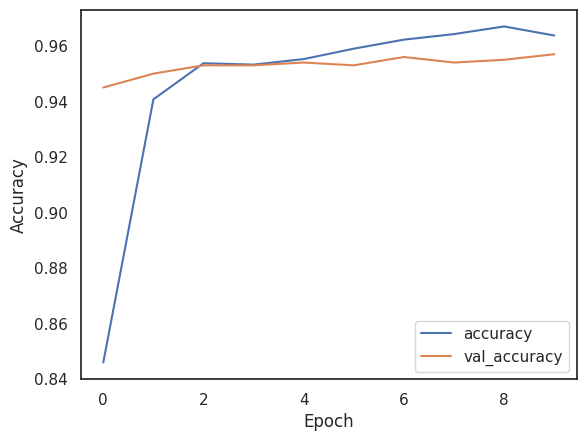

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
